<a href="https://colab.research.google.com/github/figojulioez/Laporan-Praktikum-StrukDat/blob/main/Pertemuan%2010/2410506001_STRUKDAT_DJIKSTRA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import modul yang akan digunakan
import matplotlib.pyplot as plt
import heapq
import networkx as nx

# Sebuah graph yang di implementasikan menjadi adjacency list
graph = {
  'A': {'B': 4, 'C': 2},
  'B': {'C': 1, 'D': 5},
  'C': {'D': 8, 'E': 10},
  'D': {'E': 2, 'Z': 6},
  'E': {'Z': 3},
  'Z': {}
}

# membuat sebuah fungsi algoritma djikstra dengan parameter graph sebagai struktur datanya dan parameter start untuk menentukan dimulai dari mana
def dijkstra_with_paths (graph, start):
  # membuat sebuah variabel bernama distances yang nantinya akan digunakan untuk menyimpan key node dan bobot terkecil untuk menuju node tersebut
  # pada mula - mula node di isi dengan nilai infinity
  distances = {node: float('inf') for node in graph}

  # lalu distances awal akan di ganti dengan 0
  distances[start] = 0

  # membuat sebuah variabel bernama previous yang  berguna untuk menyimpan key simpul dan value simpul sebelumnya
  # Contoh B: A berarti untuk menuju B harus melewati A
  previous = {node: None for node in graph}

  # variabel queue yang menyimpan sebuah tupple berisi bobot dan nodenya untuk menentukan simpul mana dulu yang di kunjungi
  queue = [(0, start)]

  # akan melakukan looping sampai nilai queue habis atau None
  while queue:
    # membuat sebuah variabel dengan teknik destruction variabel
    # current_distance akan menyimpan bobot dari simpul yang saat ini dikunjungi
    # current_node akan menyimpan nama node yang saat ini dikunjungi
    # heapq.heapop(queue) fungsi ini akan mengembalikan nilai dengan bobot terkecil
    current_distance, current_node = heapq.heappop(queue)

    # lalu akan melakukan looping sebanyak isi atau simpul yang terhubung dengan current_node
    # isi dari neighbor adalah simpul yang terhubung dengan current_node
    # isi dari weight adalah bobot simpul neighbor
    for neighbor, weight in graph[current_node].items() :

      # menghitung jarak dari bobot sekarang di tambah bobot dari simpul yang setelahnya
      distance = current_distance + weight

      # jika ternyata bobot node setelahnya lebih besar dari bobot distance yang sekarang
      if distance < distances[neighbor]:
        # maka akan memilih simpul tersebut dengan mengganti bobot yang lama dengan bobot yang baru yaitu distance
        distances [neighbor] = distance
        # lalu menyimpan simpul sekarang sebagai simpul yang sebelum dari simpul neighbor
        previous[neighbor] = current_node

        # menambahkan tupple (distance, neighbor) ke dalam queue yang nantinya akan dikunjungi
        heapq.heappush(queue, (distance, neighbor))

  # mengembalikan distance dan previous
  # distance akan mengembalikan bobot terkecil untuk menuju simpul tersebut
  # dan previous akan mengembalikan node sebelum menuju node setelahnya
  return distances, previous


# membuat sebuah fungsi bernama get_path dengan paramater previous dan terget dari simpul yang akan dikunjungi
def get_path(previous, target):
  # variabel yang nantinya akan digunakan untuk menyimpan node apa saja yang dikunjungi saat dari Node A ke Node B
  path = []

  # Akan melakukan looping sampai nilai target none
  while target is not None:
    # menambahkan nama dari target yang saat ini dikunjungi di awal
    path.insert(0, target)

    # lalu mengganti target dengan node sebelumnya dari node sekarang
    target = previous [target]

  # mengembalikan path saat selesai di proses
  return path


In [ ]:

# membuat sebuah fungsi yang nantinya akan memfisualisasikan graph
# fungsi memiliki parameter graph untuk menyimpan graph tersebut dan path untuk menyimpan node apa saja yang di kunjungi
def visualize_graph (graph, path=None):
  # membuat sebuah graph kosong tanpa node dan tanpa simpul
  G = nx.DiGraph ()

  # melakukan looping semua isi yang ada pada graph
  for node in graph:
    # lalu melakukan looping lagi semua simpul dan node yang terhubung pada node
    for neighbor, weight in graph[node].items():
      # membuat sebuah node, node yang terhubung dengan node sekarang dan bobotnya
      G.add_edge (node, neighbor, weight=weight)

  # digunakan untuk menghitung koordinta x dan y untuk menentukan dimana node akan diletakan
  pos = nx.spring_layout (G)

  # digunakan untuk mengambil atribut weight dari graph weight
  # contoh {('A', 'B') : 4} yang artinya dari node a ke node b berbobot 4
  edge_labels = nx.get_edge_attributes (G, 'weight')

  # membuat sebuah canva kosong yang digunakan sebagai wadah untuk mengambar graph
  plt.figure(figsize=(8, 6))

  # menggambar graph di kanvas kosong tersebut argument yang di kirim ada graph, koordinta, menggunakan label, warna dari node, ukuran dari node, ketebalan label dan menggunakan panah
  nx.draw (G, pos, with_labels=True, node_color='lightblue', node_size=2000, font_weight='bold', arrows=True)

  # menggambar label nya argunmen yang dikirim ada graph, koordintanya pos, dan nama dari labelnya
  nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

  # cek apakah path tidak 0 berarti ada node yang terhubung dengan node tersebut
  if path and len (path) > 1:
    # mengubah daftar node path menjadi daftar pasangan dari edge berurutan
    path_edges = list(zip(path, path[1:]))

    # menggambar sisi yang terhubung dari path tersebut
    nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='red',  width=3)

  # membuat sebuah tittle pada graph tersebut
  plt.title("Visualisasi Graf dan Jalur Terpendek")
  plt.axis('off')
  # menampilkan grafik
  plt.show()



Jarak dari A ke Z: 14
Jalur: A → B → D → E → Z


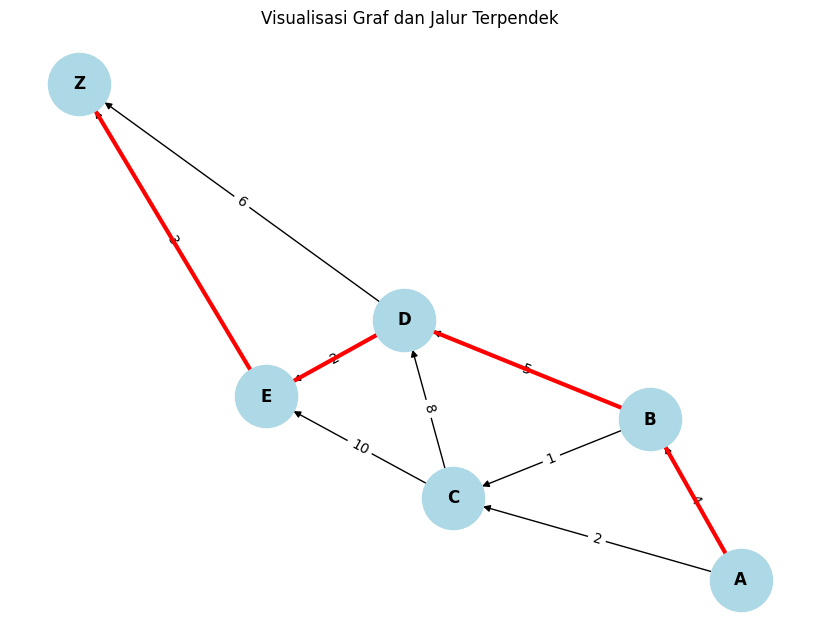

In [ ]:

# node awal
start_node = 'A'


# node akhir
end_node = 'Z'

# menjalan fungsi algoritma djikstra
distances, previous = dijkstra_with_paths (graph, start_node)

# Rekonstruksi jalur
shortest_path = get_path(previous, end_node)
print (f"Jarak dari {start_node} ke {end_node}: {distances[end_node] }")
print (f"Jalur: {' → '.join(shortest_path) }")

# Visualisasi graph
visualize_graph(graph, path=shortest_path)
